In [1]:
!pip install quantstats --upgrade --no-cache-dir
!pip install numpy
import quantstats as qs
qs.extend_pandas()
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
qs.__version__

'0.0.77'

In [3]:
np.__version__

'2.0.0'

In [6]:
stock=qs.utils.download_returns('NVDA',period='2y') 
# qs.utils.download_returns(...): función de QuantStats que, por debajo, descarga el Adj Close (vía Yahoo Finance) y lo convierte a retornos porcentuales diarios (pct_change).
stock

Date
2023-09-11    0.000000
2023-09-12   -0.006818
2023-09-13    0.013706
2023-09-14    0.002111
2023-09-15   -0.036879
                ...   
2025-09-04    0.006095
2025-09-05   -0.027030
2025-09-08    0.007724
2025-09-09    0.014556
2025-09-10    0.038475
Name: Close, Length: 502, dtype: float64

In [8]:
stock.sharpe() # ratio de Sharpe: (rendimiento medio - tasa libre de riesgo) / desviación estándar del rendimiento. Aquí, la tasa libre de riesgo se asume como 0.

np.float64(1.6077832767365996)

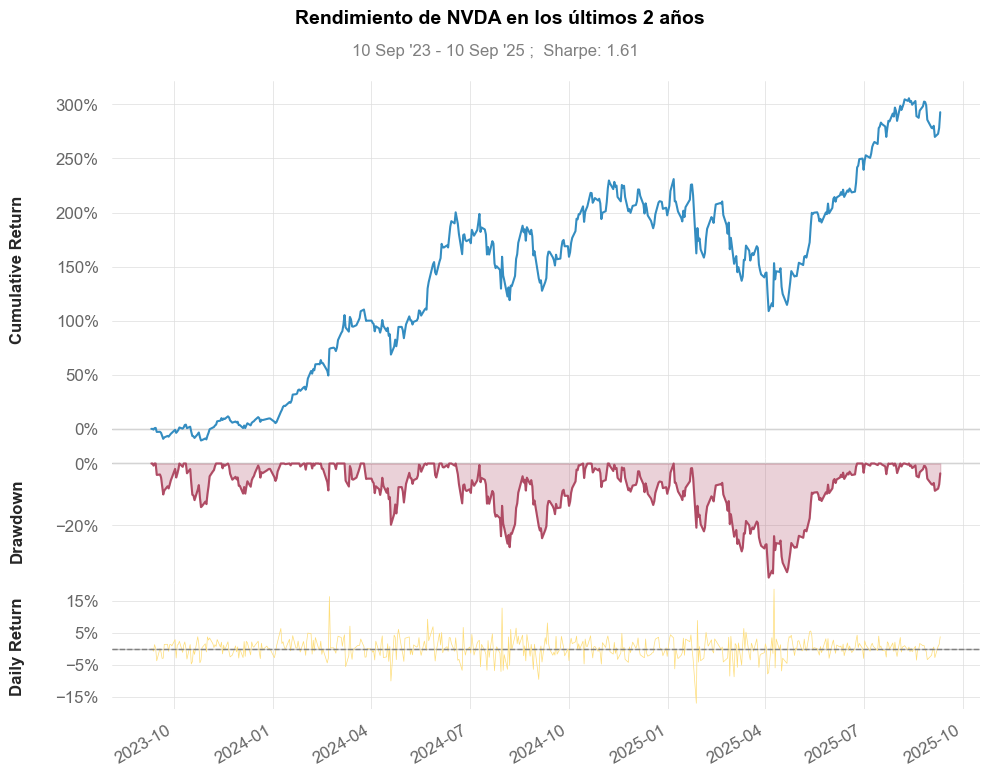

In [ ]:
qs.plots.snapshot(stock, title="Rendimiento de NVDA en los últimos 2 años",show=True)
#qs.plots.snapshot: genera un gráfico-resumen (“snapshot”) de performance para esa serie


In [11]:
from pathlib import Path
import quantstats as qs

# stock: pandas.Series de retornos diarios (ya la tienes)

# Detecta la carpeta 'output' correcta (raíz del proyecto o hermana de 'code/')
here = Path.cwd()
if (here / "output").exists():
    OUT = here / "output"
elif here.name == "code" and (here.parent / "output").exists():
    OUT = here.parent / "output"
else:
    raise FileNotFoundError("No encuentro la carpeta 'output' al mismo nivel que 'code' y 'data'.")

outfile = OUT / "NVDA_report.html"  # nombre del archivo final

# Genera y guarda el reporte
qs.reports.html(
    stock,
    title="Análisis de retornos NVDA",
    output=str(outfile),        # guarda en output/NVDA_report.html
    # benchmark="SPY",          # opcional: compara contra SPY
    # rf=0.03                   # opcional: tasa libre de riesgo anual (3%)
)

print(f"Reporte guardado en: {outfile.resolve()}")


Reporte guardado en: C:\Users\Usuario\Desktop\CICLOWAA8\python aplicado a fi\python-aplicado-a-finanzas\output\NVDA_report.html


In [19]:
from pathlib import Path
import quantstats as qs

# Estás ejecutando dentro de code/: sube a la raíz y apunta a la carpeta hermana 'output'
OUT = Path.cwd().parent / "output"
outfile = OUT / "NVDA_vs_SP500_report.html"  # evita '&' en el nombre por seguridad

qs.reports.html(
    stock,
    benchmark="SPY",
    title="Análisis de retornos de NVDA vs S&P 500",
    output=str(outfile)
)

print(f"Reporte guardado en: {outfile.resolve()}")


Reporte guardado en: C:\Users\Usuario\Desktop\CICLOWAA8\python aplicado a fi\python-aplicado-a-finanzas\output\NVDA_vs_SP500_report.html


In [21]:
tickers_1={'MSFT':0.10,'NVDA':0.10,'AMZN':0.10,'META':0.10,'LLY':0.10,'V':0.10,'MA':0.10,'CRM':0.10,'ORCL':0.10,'DIS':0.10} 
# Diccionario con los tickers y sus pesos (10% cada uno)
"""
NVDA    0.1
MSFT    0.1
AMZN    0.1
META    0.1
ORCL    0.1
LLY     0.1
V       0.1
MA      0.1
CRM     0.1
DIS     0.1
dtype: float64
"""

'\nNVDA    0.1\nMSFT    0.1\nAMZN    0.1\nMETA    0.1\nORCL    0.1\nLLY     0.1\nV       0.1\nMA      0.1\nCRM     0.1\nDIS     0.1\ndtype: float64\n'

In [22]:
estrategia=qs.utils.make_index(tickers_1,period='2y',rebalance=None) 
# qs.utils.make_index(...): función de QuantStats que descarga los datos, calcula los retornos diarios y pondera según los pesos dados.
# rebalance=None: no hay rebalanceo automático; mantiene los pesos iniciales.

In [23]:
OUT = Path.cwd().parent / "output"
outfile = OUT / "Backtesting.html"
qs.reports.html(estrategia,'SPY',title='Cartera Optima vs S&P500',output=str(outfile))

In [24]:
import os
os.startfile(outfile)  # Windows: se abre como doble-clic en tu navegador predeterminado